In [19]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [30]:
data = pd.read_csv('/content/sample_data/Admission_Predict.csv')

In [31]:
data

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


In [32]:
data = data.drop('Serial No.', axis = 1)

In [33]:
data

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1,0.82
396,325,107,3,3.0,3.5,9.11,1,0.84
397,330,116,4,5.0,4.5,9.45,1,0.91
398,312,103,3,3.5,4.0,8.78,0,0.67


In [34]:
x = data.drop('Chance of Admit ', axis = 1)
y = data['Chance of Admit ']

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size =0.3, random_state=92)

In [53]:
tf.random.set_seed= 42

model=tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation = 'leaky_relu'),
    tf.keras.layers.Dense(50, activation = 'leaky_relu'),
    tf.keras.layers.Dense(25, activation = 'leaky_relu'),
    tf.keras.layers.Dense(1, activation= 'leaky_relu')])

model.compile(loss = tf.keras.losses.MeanSquaredError(),
              optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
              metrics =['mae'])

model.fit(X_train, y_train, epochs =70, verbose = 1)

Epoch 1/70
9/9 [==============================] - 2s 4ms/step - loss: 28.4771 - mae: 4.3820
Epoch 2/70
9/9 [==============================] - 0s 3ms/step - loss: 21.2465 - mae: 4.5025
Epoch 3/70
9/9 [==============================] - 0s 5ms/step - loss: 3.1108 - mae: 1.5437
Epoch 4/70
9/9 [==============================] - 0s 4ms/step - loss: 3.0766 - mae: 1.7282
Epoch 5/70
9/9 [==============================] - 0s 4ms/step - loss: 1.4308 - mae: 1.1340
Epoch 6/70
9/9 [==============================] - 0s 5ms/step - loss: 0.7457 - mae: 0.8247
Epoch 7/70
9/9 [==============================] - 0s 4ms/step - loss: 0.3607 - mae: 0.5411
Epoch 8/70
9/9 [==============================] - 0s 4ms/step - loss: 0.1442 - mae: 0.3240
Epoch 9/70
9/9 [==============================] - 0s 4ms/step - loss: 0.0815 - mae: 0.2415
Epoch 10/70
9/9 [==============================] - 0s 4ms/step - loss: 0.0386 - mae: 0.1585
Epoch 11/70
9/9 [==============================] - 0s 4ms/step - loss: 0.0272 - mae: 0.

In [58]:
loss, mae = model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 3ms/step - loss: 0.0056 - mae: 0.0545


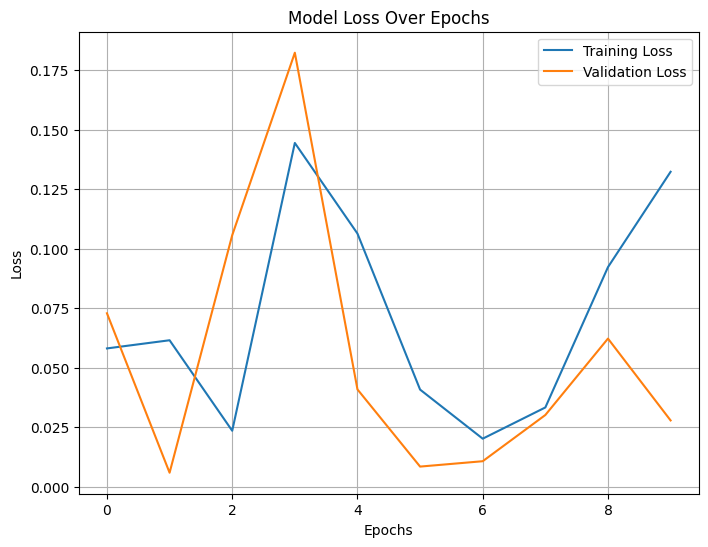

In [59]:
training_results = model.fit(X_train, y_train, epochs =10, verbose = 0, validation_data=(X_test, y_test))
plt.figure(figsize=(8, 6))
plt.plot(training_results.history['loss'], label='Training Loss')
plt.plot(training_results.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()